In [20]:
%%bash
#strace -f -tt -T -r -y -o logs/dfg_vis.st python src/mmarrays.py 100000
strace -f -tt -T -r -y -o logs/dfg_vis.st python src/multi_threaded.py

In [1]:
from strace_miner.miner import IOMinerV4
from strace_miner.preprocessor import IOLineReaderV2
from strace_miner.visualization import DFGVisualizerV1

In [8]:
st_logs = ['logs/python_a65243794be3_24779.st','logs/python_a65243794be3_24781.st']
#st_logs = ['logs/dfg_vis.st',]
io_calls = ['read','write']
#line_reader = IOLineReaderV2(['data_rank',],collapse=True)
line_reader = IOLineReaderV2(['/dev/data/',],collapse=False)
#line_reader = IOLineReaderV2(collapse=False)
sta = IOMinerV4(st_logs,io_calls,line_reader)
sta.preprocess()
sta.prepare_summaries_and_event_log()
sta.prepare_dfg()

CSV log path: logs/python_a65243794be3_24779.csv
CSV log path: logs/python_a65243794be3_24781.csv

Overall Summary:

Run time: 1.089s
Total duration of Sys calls: 5.143s
System load: 4.724

IO duration: 0.052s
IO load: 1.00%
Total IO events: 27



/home/vscode/.local/lib/python3.12/site-packages/pm4py/utils.py:538: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


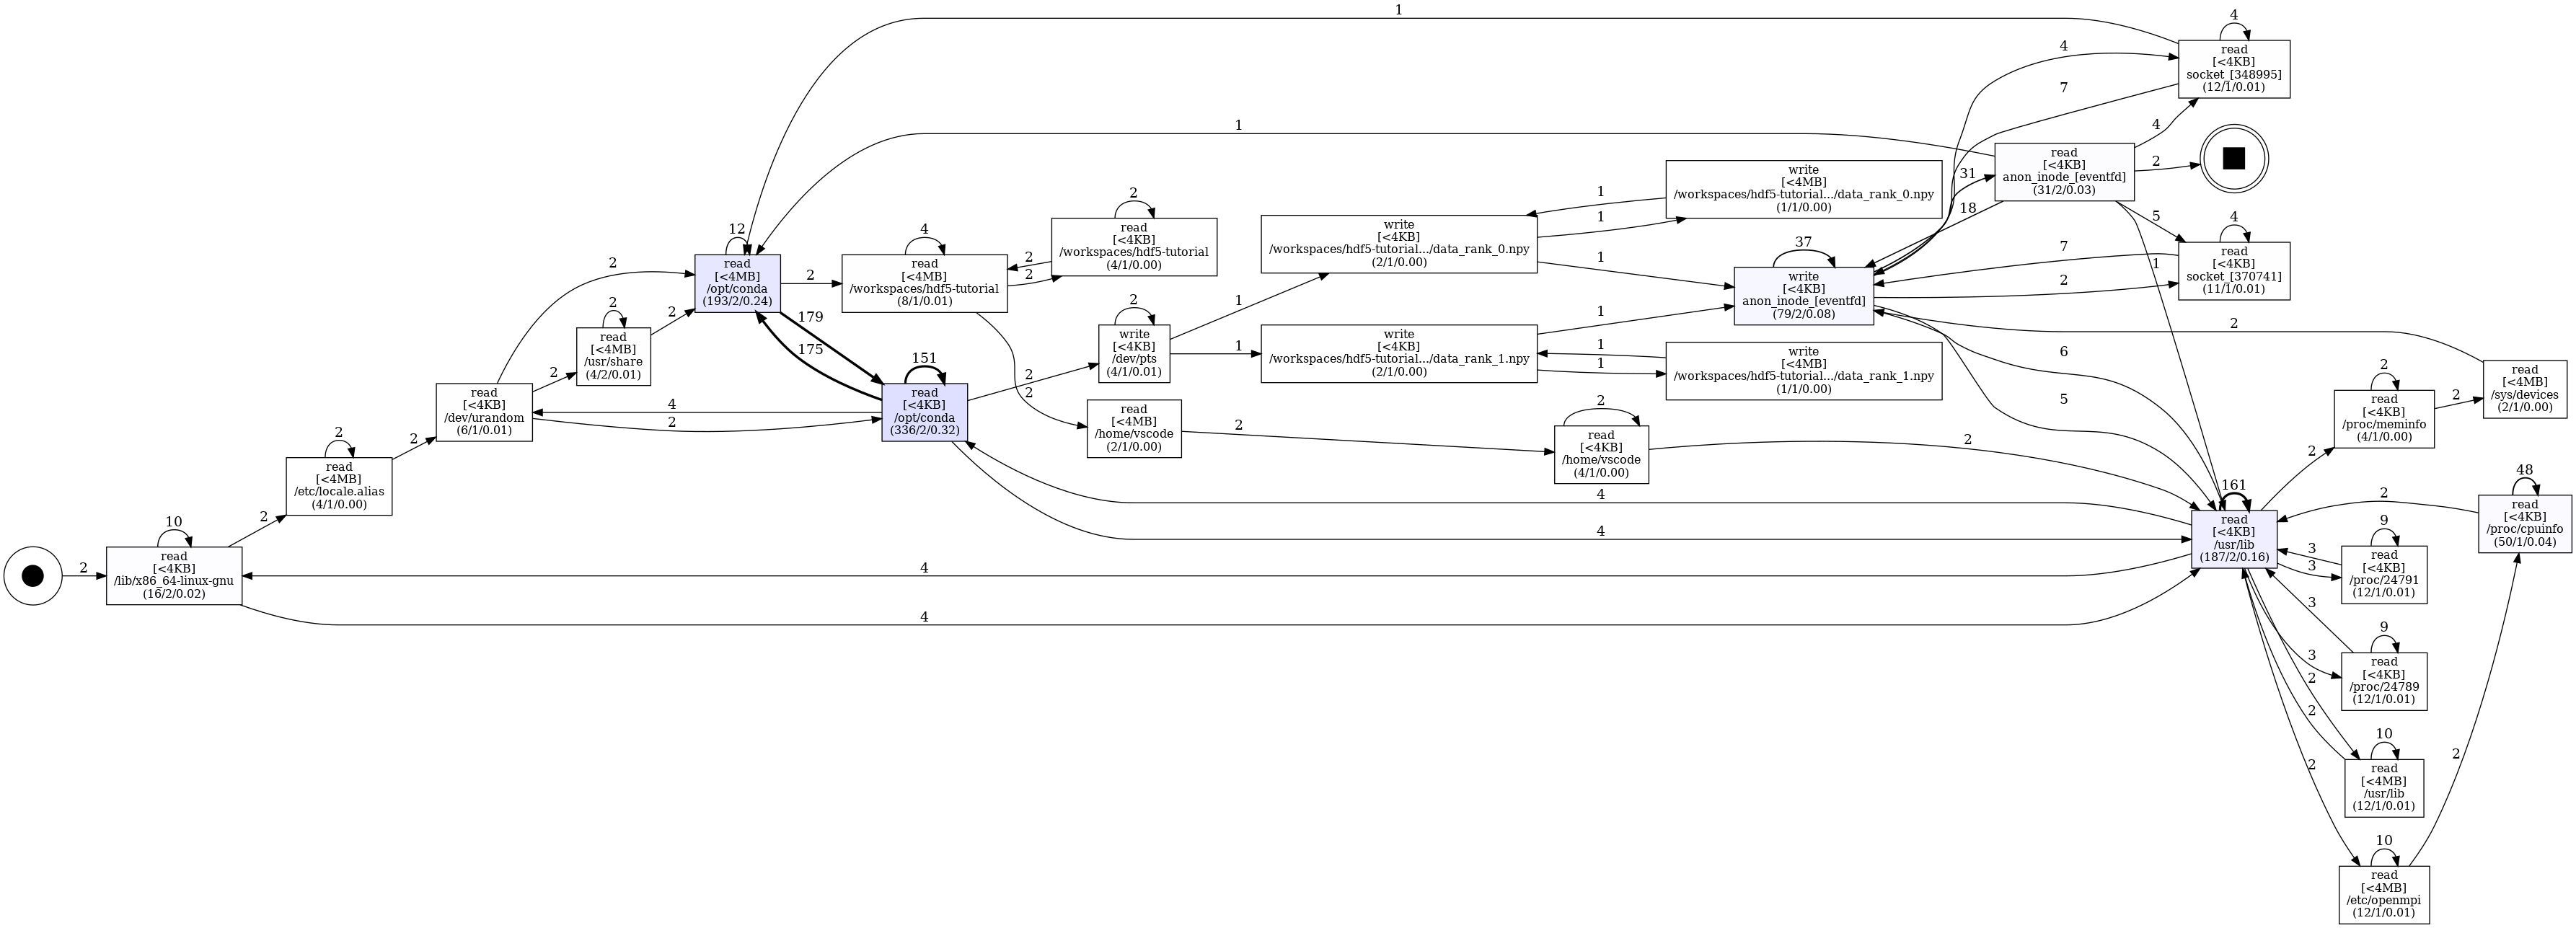

In [9]:
dfg_vis = DFGVisualizerV1(sta.dfg,sta.dfg_im,sta.dfg_fm, sta.activities_summary)
dfg_vis.view_in_jupyter()

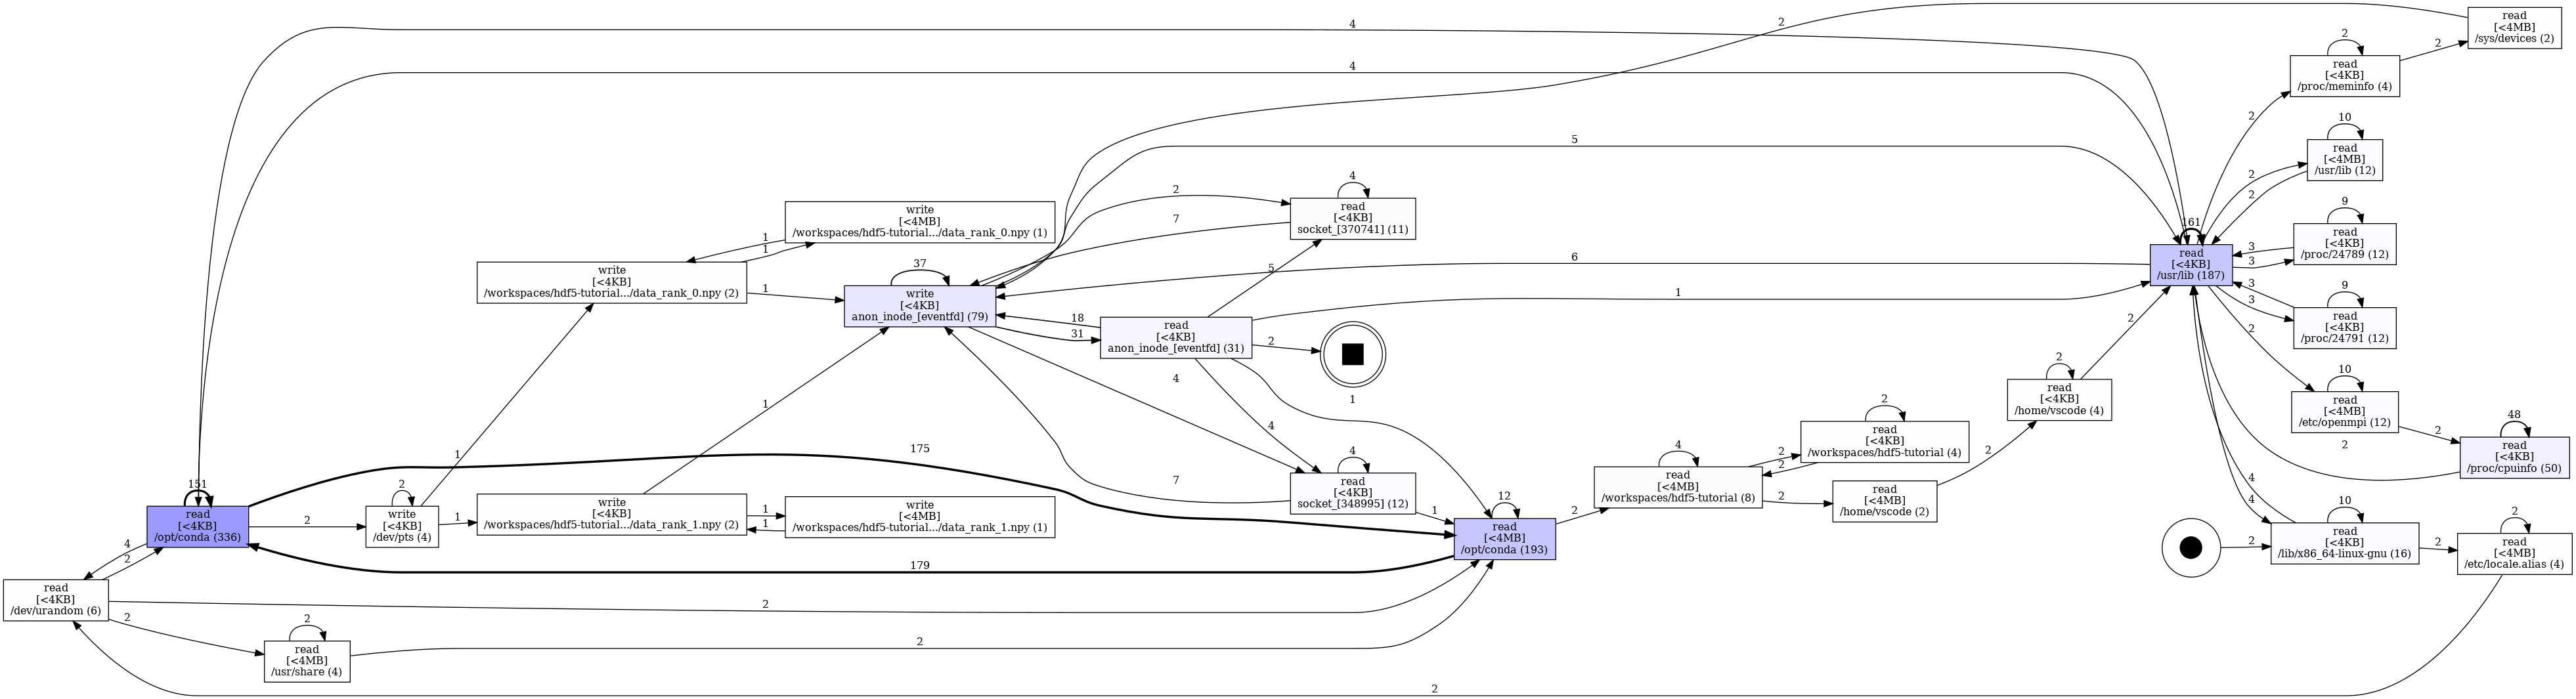

In [10]:
sta.view_dfg()

In [8]:
# from pm4py.visualization.dfg import visualizer as dfg_visualizer
# def get_dfg_gviz(dfg,im,fm):  
#     dfg_parameters = dfg_visualizer.Variants.FREQUENCY.value.Parameters
#     parameters = {}
#     parameters[dfg_parameters.START_ACTIVITIES] = im
#     parameters[dfg_parameters.END_ACTIVITIES] = fm
    
#     return dfg_visualizer.apply(dfg, parameters=parameters)

# gx = get_dfg_gviz(sta.dfg,sta.dfg_im,sta.dfg_fm)

In [9]:
#gx